<a href="https://colab.research.google.com/github/Cvelsen22/Carmelo-Velez---Data-Analysis-Portfolio/blob/main/Modeling_Car_Insurance_Claim_Outcomes_Logistic_Reg_%26_Knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The dataset

| Column | Description |
|--------|-------------|
| `id`   | Unique client identifier |
| `age`  | Client's age: <br> <ul><li>`0`: 16-15</li><li>`1`: 26-39</li><li>`2`: 40-64</li><li>`3`: 65+</li></ul> |
| `gender` | Client's gender: <br> <ul><li>`0`: Female</li><li>`1`: Male</li></ul> |
| `driving_experience` | Years the client has been driving: <br> <ul><li>`0`: 0-9</li><li>`1`: 10-19</li><li>`2`: 20-29</li><li>`3`: 30+</li></ul> |
| `education` | Client's level of education: <br> <ul><li>`0`: No education</li><li>`1`: High school</li><li>`2`: University</li></ul> |
| `income` | Client's income level: <br> <ul><li>`0`: Poverty</li><li>`1`: Working class</li><li>`2`: Middle class</li><li>`3`: Upper class</li></ul> |
| `credit_score` | Client's credit score (between zero and one) |
| `vehicle_ownership` | Client's vehicle ownership status: <br><ul><li>`0`: Does not own their vehilce (paying off finance)</li><li>`1`: Owns their vehicle</li></ul> |
| `vehcile_year` | Year of vehicle registration: <br><ul><li>`0`: Before 2015</li><li>`1`: 2015 or later</li></ul> |
| `married` | Client's marital status: <br><ul><li>`0`: Not married</li><li>`1`: Married</li></ul> |
| `children` | Client's number of children |
| `postal_code` | Client's postal code |
| `annual_mileage` | Number of miles driven by the client each year |
| `vehicle_type` | Type of car: <br> <ul><li>`0`: Sedan</li><li>`1`: Sports car</li></ul> |
| `speeding_violations` | Total number of speeding violations received by the client |
| `duis` | Number of times the client has been caught driving under the influence of alcohol |
| `past_accidents` | Total number of previous accidents the client has been involved in |
| `outcome` | Whether the client made a claim on their car insurance (response variable): <br><ul><li>`0`: No claim</li><li>`1`: Made a claim</li></ul> |



In [92]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
# Read in dataset
cars = pd.read_csv("car_insurance.csv")

In [94]:
cars.head()

,id,age,gender,driving_experience,education,income,credit_score,vehicle_ownership,vehicle_year,married,children,postal_code,annual_mileage,vehicle_type,speeding_violations,duis,past_accidents,outcome
0,569520,3,0,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,0,1,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,0,0,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,0,1,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,1,1,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


In [95]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [96]:
cars_0 = cars.drop(['id', 'postal_code'], axis = 1)

In [97]:
# Filter the DataFrame for object columns
non_numeric = cars_0.select_dtypes("object")

# Loop through columns
for col in non_numeric.columns:

  # Print the number of unique values
  print(f"Number of unique values in {col} column: ", non_numeric[col].nunique())

Number of unique values in driving_experience column:  4
Number of unique values in education column:  3
Number of unique values in income column:  4
Number of unique values in vehicle_year column:  2
Number of unique values in vehicle_type column:  2


In [98]:
cars_0['driving_experience'].value_counts()

0-9y      3530
10-19y    3299
20-29y    2119
30y+      1052
Name: driving_experience, dtype: int64

In [99]:
cars_0['factorized_driving_experience'] = pd.factorize(cars_0['driving_experience'])[0]

In [100]:
cars_0['factorized_driving_experience'].value_counts()

0    3530
1    3299
2    2119
3    1052
Name: factorized_driving_experience, dtype: int64

In [101]:
def factorize_columns(df, column, new_column):
  df[new_column] = pd.factorize(df[column])[0]
  return df[new_column].value_counts()

In [102]:
cars_0['education'].value_counts()

high school    4157
university     3928
none           1915
Name: education, dtype: int64

In [103]:
ordered_education_categories = ['none', 'high school', 'university']
# Convert the categorical column to an integer column while preserving order
cars_0['education_encoded'] = pd.Categorical(cars_0['education'], categories=ordered_education_categories, ordered=True).codes

In [104]:
cars_0['education_encoded'].value_counts()

1    4157
2    3928
0    1915
Name: education_encoded, dtype: int64

In [105]:
def encode_column(ordered_categories, df, column, new_column_name):
  df[new_column_name] = pd.Categorical(df[column], categories = ordered_categories, ordered=True).codes
  return df[new_column_name].value_counts()

In [106]:
cars_0['income'].value_counts()

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: income, dtype: int64

In [107]:
encode_column(['poverty', 'working class', 'middle class', 'upper class'], cars_0, 'income', 'encoded_income')

3    4336
2    2138
0    1814
1    1712
Name: encoded_income, dtype: int64

In [108]:
cars_0['vehicle_year'].value_counts()

before 2015    6967
after 2015     3033
Name: vehicle_year, dtype: int64

In [109]:
encode_column(['before 2015', 'after 2015'], cars_0, 'vehicle_year', 'encoded_vehicle_year')

0    6967
1    3033
Name: encoded_vehicle_year, dtype: int64

In [110]:
cars_0['vehicle_type'].value_counts()

sedan         9523
sports car     477
Name: vehicle_type, dtype: int64

In [111]:
factorize_columns(cars_0, 'vehicle_type', 'factorize_vehicle_type')

0    9523
1     477
Name: factorize_vehicle_type, dtype: int64

In [112]:
def drop_column(df, columns):
  new_df = df(columns, axis = 1)
  return new_df.info()

In [113]:
cars_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  int64  
 2   driving_experience             10000 non-null  object 
 3   education                      10000 non-null  object 
 4   income                         10000 non-null  object 
 5   credit_score                   9018 non-null   float64
 6   vehicle_ownership              10000 non-null  float64
 7   vehicle_year                   10000 non-null  object 
 8   married                        10000 non-null  float64
 9   children                       10000 non-null  float64
 10  annual_mileage                 9043 non-null   float64
 11  vehicle_type                   10000 non-null  object 
 12  speeding_violations            10000 non-null  

In [114]:
preprocessed_data = cars_0.drop(['driving_experience', 'education', 'income', 'vehicle_year', 'vehicle_type'], axis = 1)

In [115]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  int64  
 2   credit_score                   9018 non-null   float64
 3   vehicle_ownership              10000 non-null  float64
 4   married                        10000 non-null  float64
 5   children                       10000 non-null  float64
 6   annual_mileage                 9043 non-null   float64
 7   speeding_violations            10000 non-null  int64  
 8   duis                           10000 non-null  int64  
 9   past_accidents                 10000 non-null  int64  
 10  outcome                        10000 non-null  float64
 11  factorized_driving_experience  10000 non-null  int64  
 12  education_encoded              10000 non-null  

In [116]:
preprocessed_data['credit_score'].describe()

count    9018.000000
mean        0.515813
std         0.137688
min         0.053358
25%         0.417191
50%         0.525033
75%         0.618312
max         0.960819
Name: credit_score, dtype: float64

In [117]:
preprocessed_data['vehicle_ownership'].value_counts()

1.0    6970
0.0    3030
Name: vehicle_ownership, dtype: int64

In [118]:
preprocessed_data['married'].value_counts()

0.0    5018
1.0    4982
Name: married, dtype: int64

In [119]:
preprocessed_data['children'].value_counts()

1.0    6888
0.0    3112
Name: children, dtype: int64

In [120]:
preprocessed_data['annual_mileage'].describe()

count     9043.000000
mean     11697.003207
std       2818.434528
min       2000.000000
25%      10000.000000
50%      12000.000000
75%      14000.000000
max      22000.000000
Name: annual_mileage, dtype: float64

In [121]:
preprocessed_data['speeding_violations'].value_counts()

0     5028
1     1544
2     1161
3      830
4      530
5      319
6      188
7      140
8       75
10      50
9       49
11      30
12      20
13      12
15       8
14       5
16       4
17       3
19       2
18       1
22       1
Name: speeding_violations, dtype: int64

In [122]:
preprocessed_data['duis'].value_counts()

0    8118
1    1470
2     331
3      68
4      10
5       2
6       1
Name: duis, dtype: int64

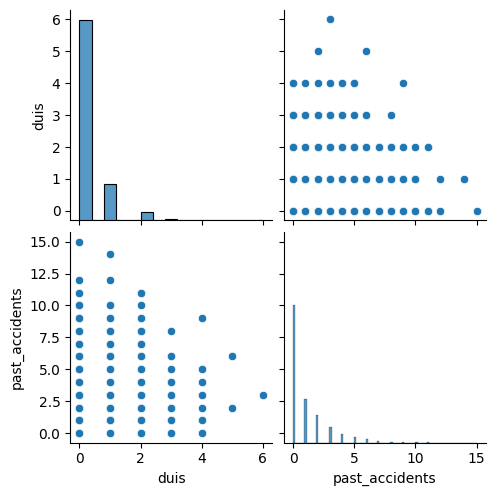

In [123]:
# Create a pairplot for duis and past_accidents
sns.pairplot(data=preprocessed_data,vars=["duis","past_accidents"])
plt.show()

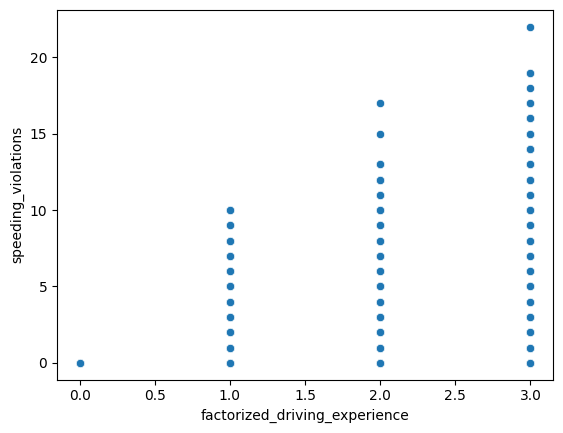

In [124]:
# Create the scatterplot
sns.scatterplot(data=preprocessed_data,x="factorized_driving_experience",y="speeding_violations")
plt.show()

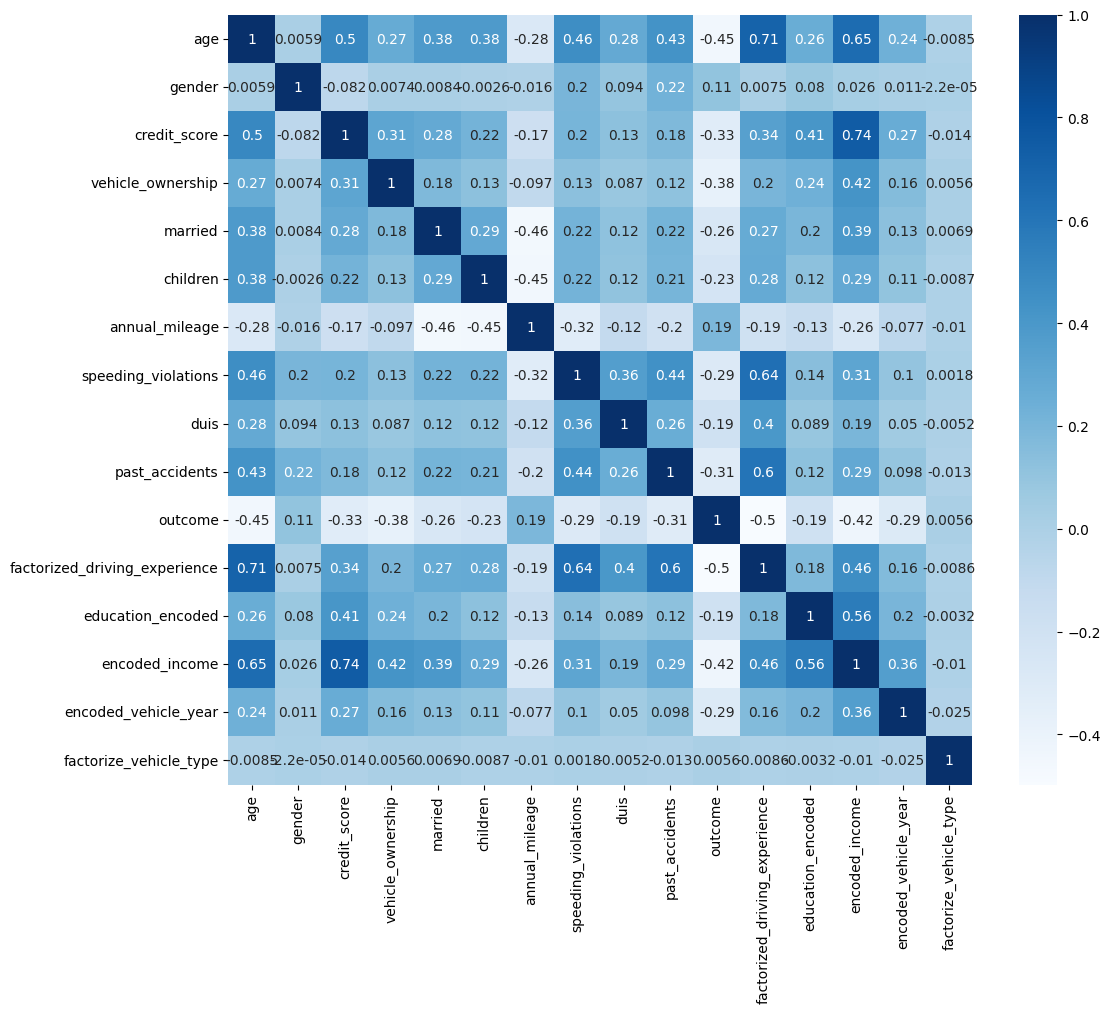

In [125]:
plt.figure(figsize=(12,10))
sns.heatmap(preprocessed_data.corr(numeric_only=True),cmap='Blues',annot=True);

In [126]:
# Fill missing values with the mean
preprocessed_data["credit_score"].fillna(preprocessed_data["credit_score"].mean(), inplace=True)
preprocessed_data["annual_mileage"].fillna(preprocessed_data["annual_mileage"].mean(), inplace=True)

In [127]:
preprocessed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            10000 non-null  int64  
 1   gender                         10000 non-null  int64  
 2   credit_score                   10000 non-null  float64
 3   vehicle_ownership              10000 non-null  float64
 4   married                        10000 non-null  float64
 5   children                       10000 non-null  float64
 6   annual_mileage                 10000 non-null  float64
 7   speeding_violations            10000 non-null  int64  
 8   duis                           10000 non-null  int64  
 9   past_accidents                 10000 non-null  int64  
 10  outcome                        10000 non-null  float64
 11  factorized_driving_experience  10000 non-null  int64  
 12  education_encoded              10000 non-null  

# k-Nearest Neighbors: Fit

In [128]:
from sklearn.neighbors import KNeighborsClassifier

In [129]:
knn_data=preprocessed_data

In [130]:
# Import the module
from sklearn.model_selection import train_test_split

In [131]:
X = knn_data.drop("outcome", axis=1).values
y = knn_data["outcome"].values

In [132]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
knn_random_test = KNeighborsClassifier(n_neighbors=7)

In [133]:
# Fit the classifier to the training data
knn_random_test.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [134]:
# Print the accuracy
print(knn_random_test.score(X_test, y_test))

0.795


In [135]:
# Create neighbors
neighbors = np.arange(1, 21)
train_accuracies = {}
test_accuracies = {}

for neighbor in neighbors:

	# Set up a KNN Classifier
	knn = KNeighborsClassifier(n_neighbors=neighbor)

	# Fit the model
	knn.fit(X_train, y_train)

	# Compute accuracy
	train_accuracies[neighbor] = knn.score(X_train, y_train)
	test_accuracies[neighbor] = knn.score(X_test, y_test)
print('neighbors:', neighbors, '\n', 'train_accuracies:', train_accuracies, '\n', 'test_accuracies:', test_accuracies)

neighbors: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20] 
 train_accuracies: {1: 0.999125, 2: 0.883125, 3: 0.886625, 4: 0.86425, 5: 0.862, 6: 0.845375, 7: 0.845875, 8: 0.840375, 9: 0.840125, 10: 0.83475, 11: 0.834625, 12: 0.8315, 13: 0.8315, 14: 0.831, 15: 0.830875, 16: 0.82825, 17: 0.82775, 18: 0.824625, 19: 0.8255, 20: 0.82475} 
 test_accuracies: {1: 0.7535, 2: 0.7675, 3: 0.785, 4: 0.784, 5: 0.79, 6: 0.794, 7: 0.795, 8: 0.797, 9: 0.796, 10: 0.8005, 11: 0.7975, 12: 0.8, 13: 0.799, 14: 0.803, 15: 0.7995, 16: 0.7975, 17: 0.8005, 18: 0.7985, 19: 0.7955, 20: 0.7995}


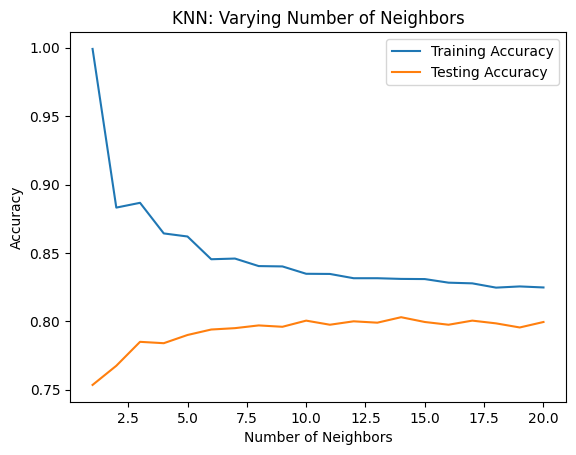

In [136]:
# Add a title
plt.title("KNN: Varying Number of Neighbors")

# Plot training accuracies
plt.plot(neighbors, train_accuracies.values(), label="Training Accuracy")

# Plot test accuracies
plt.plot(neighbors, test_accuracies.values(), label="Testing Accuracy")

plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Accuracy")

# Display the plot
plt.show()

# Cross-validation

In [137]:
knn_model = KNeighborsClassifier()

In [138]:
# Import the necessary modules
from sklearn.model_selection import cross_val_score, KFold

In [139]:
# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

In [140]:
# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(knn_model, X, y, cv=kf)

In [141]:
# Print scores
print("scores:",cv_scores)

scores: [0.80803839 0.79064187 0.79124175 0.78824235 0.80312125 0.79411765]


# Hyperparameter tuning with GridSearchCV

In [142]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [143]:
# Set up the parameter grid
param_grid = {"n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,]}

In [144]:
# Instantiate lasso_cv
knn_cv = GridSearchCV(knn_model, param_grid, cv=kf)

In [145]:
# Fit to the training data
knn_cv.fit(X_train,y_train)
print("Tuned knn paramaters: {}".format(knn_cv.best_params_))
print("Tuned knn score: {}".format(knn_cv.best_score_))

Tuned knn paramaters: {'n_neighbors': 18}
Tuned knn score: 0.8099987890525856


# Fine-Tuning Model

In [146]:
# Import confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

In [147]:
# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

In [148]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1222  151]
 [ 250  377]]
              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1373
         1.0       0.71      0.60      0.65       627

    accuracy                           0.80      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.79      0.80      0.79      2000



# Logistic regression and the ROC curve

In [149]:
# Fit the model
logreg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [150]:
# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print("y_pred_probs:", y_pred_probs[:10])

y_pred_probs: [3.49206256e-01 8.39138406e-04 4.57506983e-01 7.62982695e-01
 3.71801254e-01 9.16813758e-01 1.66546020e-01 1.22953530e-02
 9.37812106e-01 1.25934202e-02]


# The ROC curve

In [151]:
# Import roc_curve
from sklearn.metrics import roc_curve

In [152]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

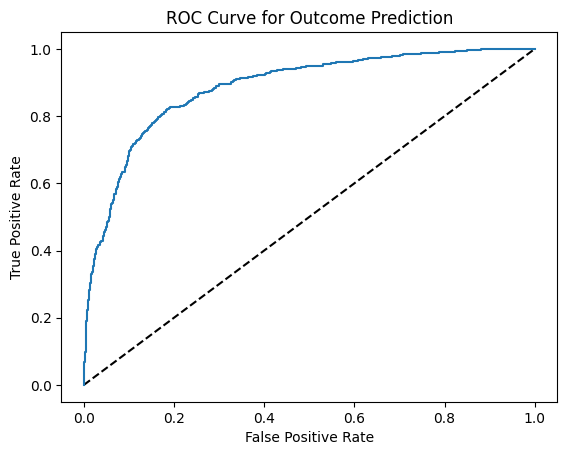

In [153]:
plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Outcome Prediction')
plt.show()

# ROC AUC

In [154]:
# Import roc_auc_score
from sklearn.metrics import roc_auc_score

In [155]:
# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.8847632223643265


In [156]:
# Calculate the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[1222  151]
 [ 250  377]]


In [157]:
# Calculate the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.89      0.86      1373
         1.0       0.71      0.60      0.65       627

    accuracy                           0.80      2000
   macro avg       0.77      0.75      0.76      2000
weighted avg       0.79      0.80      0.79      2000



# Hyperparameter tuning with GridSearchCV


In [158]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [162]:
from sklearn.model_selection import RandomizedSearchCV

In [160]:
# Create the parameter space
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

In [163]:
# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

In [164]:
# Fit the data to the model
logreg_cv.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomizedSearchCV(cv=KFold(n_splits=6, random_state=5, shuffle=True),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([0.1       , 0.11836735, 0.13673469, 0.15510204, 0.17346939,
       0.19183673, 0.21020408, 0.22857143, 0.24693878, 0.26530612,
       0.28367347, 0.30204082, 0.32040816, 0.33877551, 0.35714286,
       0.3755102 , 0.39387755, 0.4122449 , 0.43061224, 0.44897959,
       0.467346...
       4.89846939e-01, 5.10253061e-01, 5.30659184e-01, 5.51065306e-01,
       5.71471429e-01, 5.91877551e-01, 6.12283673e-01, 6.32689796e-01,
       6.53095918e-01, 6.73502041e-01, 6.93908163e-01, 7.14314286e-01,
       7.34720408e-01, 7.55126531e-01, 7.75532653e-01, 7.95938776e-01,
       8.16344898e-01, 8.36751020e-01, 8.57157143e-01, 8.77563265e-01,
       8.97969388e-01, 9.18375510e-01, 9.38781633e-01, 9.59187755e-01,
       9.79593878e-01, 1.00000000e+00])})

In [165]:
# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': 0.2041612244897959, 'penalty': 'l2', 'class_weight': 'balanced', 'C': 0.6877551020408164}
Tuned Logistic Regression Best Accuracy Score: 0.8087497886465619
